# REQ GATHERING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Capstone Bangkit/DATA_SCRAPPING')
!ls

MessageError: ignored

In [ ]:
!mkdir scraper
!pip install beautifulsoup4
!pip install requests
!pip install pandas

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# SCRAPE OPS
https://scrapeops.io/web-scraping-playbook/403-forbidden-error-web-scraping/

In [ ]:
import requests
HEADERS = {'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}
URL = "https://www.smartbuyglasses.co.id/designer-eyeglasses"
glassesLink = []

for x in range (1,5):
  url = 'https://www.smartbuyglasses.co.id/designer-eyeglasses?page={}'.format(x)
  page = requests.get(url, headers=HEADERS)
  # soup = BeautifulSoup(page.content, 'html.parser')

  if page.status_code == 200:
    soup = BeautifulSoup(page.content, 'html.parser')
    productlist = soup.find_all("a", class_="d-block text-center grid-pro-item-js undefined product-list_desktop-pro-item__gmSKy mt-4")
    for glasses in productlist:
      link = glasses.get('href')
      glassesLink.append(URL+link)
    print(len(glassesLink))

  else:
    print(f"Request ke {url} gagal, status code: {page.status_code}")

59
118
177
236


In [ ]:
fields = ['Link', 'Name', 'Brand', 'FaceShape', 'Price', 'Pic1', 'Pic2', 'Pic3', 'Gender', 'FrameColour', 'FrameShape', 'FrameStyle', 'FrameMaterial']

In [ ]:
link_contoh = "https://www.smartbuyglasses.co.id/designer-eyeglasses/designer-eyeglasses/Dsquared2/Dsquared2-DQ5246-052-388896.html"
nama, brand = getBrandName(link_contoh)

print(brand)

Dsquared2


https://www.smartbuyglasses.co.id/designer-eyeglasses/oval-face?faceShape=oval-face

In [ ]:
def getLinkShape(glasses, x, glassLink, glassFaceShape, glassName, glassBrand):
  base_url = "https://www.smartbuyglasses.co.id/designer-eyeglasses"
  link = glasses.get('href')
  final_link = base_url + link
  glassLink.append(final_link)
  glassFaceShape.append(x)

  nama, brand = getBrandName(final_link)
  glassName.append(nama)
  glassBrand.append(brand)

def getBrandName(link):
  potongan_link = link.split('/')[-1]
  potongan_link = potongan_link.rsplit('-', 1)[0]
  nama = potongan_link.replace('-', ' ')

  potongan_link_brand = link.split('designer-eyeglasses/')[-1]
  brand = potongan_link_brand.split('/')[0]

  return nama, brand

def getPrice(glasses):
  a = glasses.select_one('.product-list_pro-price__jkMSU span:first-child')
  harga = a.text.replace('RP', '').strip()
  glassPrice.append(int(harga))

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# di gallery home
glassLink = []
glassName = []
glassBrand = []
glassFaceShape = []
glassPrice = []

# inside each glasses link
glassDetails = []

HEADERS = {'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}
URL = "https://www.smartbuyglasses.co.id/designer-eyeglasses"
faceShape = ['heart', 'oval', 'round', 'square', 'triangle']

for x in faceShape:
  url = 'https://www.smartbuyglasses.co.id/designer-eyeglasses/{}-face?faceShape={}-shape'.format(x, x)
  page = requests.get(url, headers=HEADERS)

  if page.status_code == 200:
      soup = BeautifulSoup(page.content, 'html.parser')
      glassList = soup.find_all("a", class_="d-block text-center grid-pro-item-js undefined product-list_desktop-pro-item__gmSKy mt-4")
      for glasses in glassList:
        getLinkShape(glasses, x, glassLink, glassFaceShape, glassName, glassBrand)
        getPrice(glasses)

  else:
    print(f"Request ke {url} gagal, status code: {page.status_code}")
    break

In [ ]:
glassDetails

[['Unisex', 'Black Purple', 'Rectangle', 'Full Rim', 'Cellulose Propionate'],
 ['Unisex', 'Light Gunmetal', 'Rectangle', 'Rimless', 'Metal'],
 ['Unisex', 'Dark Tortoise', 'Oval', 'Full Rim', 'Acetate'],
 ['Men', 'Satin Black', 'Rectangle', 'Full Rim', 'Plastic'],
 ['Unisex', 'Silver', 'Round', 'Full Rim', 'Metal'],
 ['Unisex', 'Black', 'Round', 'Full Rim', 'Metal'],
 ['Unisex', 'Black', 'Rectangle', 'Full Rim', 'Cellulose Propionate'],
 ['Men', 'Transparent Grey', 'Rectangle', 'Full Rim', 'Plastic'],
 ['Men', 'Matte Black', 'Wayfarer', 'Full Rim', 'Acetate'],
 ['Unisex', 'Transparent Grey', 'Round', 'Full Rim', 'Plastic'],
 ['Unisex', 'Tortoise', 'Oval', 'Full Rim', 'Acetate'],
 ['Unisex', 'Sandblast Black', 'Rectangle', 'Full Rim', 'Acetate'],
 ['Men', 'Matte Black', 'Rectangle', 'Full Rim', 'Titanium'],
 ['Unisex', 'Gold', 'Rectangle', 'Rimless', 'Metal'],
 ['Unisex', 'Gold', 'Oval', 'Full Rim', 'Metal'],
 ['Men', 'Satin Black', 'Rectangle', 'Full Rim', 'Plastic'],
 ['Men', 'Transpar

In [ ]:
y=0
for link in glassLink[253:]:
  y+=1
print(y)

42


In [ ]:
# glassDetails = []
HEADERS = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:12.0) Gecko/20100101 Firefox/12.0'}

x=0

for link in glassLink[253:]:
  page = requests.get(link, headers=HEADERS)

  if page.status_code == 200:
    soup = BeautifulSoup(page.content, 'html.parser')
    spec_items = soup.find_all('div', class_='pro-technical-specification-item mb-3')

    glass_detail_link = {}

    for item in spec_items:
      label, value = item.get_text(strip=True).split(':')
      glass_detail_link[label.strip()] = value.strip()

    gender = glass_detail_link.get('Gender', 'N/A')
    frame_color = glass_detail_link.get('Frame Colour', 'N/A')
    frame_shape = glass_detail_link.get('Frame Shape', 'N/A')
    frame_style = glass_detail_link.get('Frame Style', 'N/A')
    frame_material = glass_detail_link.get('Frame Material', 'N/A')

    glass_list = [gender, frame_color, frame_shape, frame_style, frame_material]
    glassDetails.append(glass_list)

    x+=1
    print("request done:", x)

  else:
    print(f"Request ke {link} gagal, status code: {page.status_code}")
    break

request done: 1
request done: 2
request done: 3
request done: 4
request done: 5
request done: 6
request done: 7
request done: 8
request done: 9
request done: 10
request done: 11
request done: 12
request done: 13
request done: 14
request done: 15
request done: 16
request done: 17
request done: 18
request done: 19
request done: 20
request done: 21
request done: 22
request done: 23
request done: 24
request done: 25
request done: 26
request done: 27
request done: 28
request done: 29
request done: 30
request done: 31
request done: 32
request done: 33
request done: 34
request done: 35
request done: 36
request done: 37
request done: 38
request done: 39
request done: 40
request done: 41
request done: 42


In [ ]:
len(glassDetails)

253

In [ ]:
glassDetails = []

link = "https://www.smartbuyglasses.co.id/designer-eyeglasses/designer-eyeglasses/SmartBuy-Collection/SmartBuy-Collection-Kensington-AC32-414295.html"
HEADERS = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:12.0) Gecko/20100101 Firefox/12.0'}

page = requests.get(link, headers=HEADERS)
soup = BeautifulSoup(page.content, 'html.parser')
spec_items = soup.find_all('div', class_='pro-technical-specification-item')

for item in spec_items:
  category = item.get_text(strip=True).split(':')[0]
  detail = item.find('span', class_='specification-info')

  if detail:
    glassDetails.append(f"{category}: {detail.get_text(strip=True)}")

print(glassDetails)

['Gender: Unisex', 'Year: 2018', 'UPC: 5055860834840', "Prescription Range: '-7.00 ~ +7.00", 'Lens Material: Customisable', 'Lens Color: Clear', 'Manufacturer: SmartBuyGlasses Optical Group', 'Progressive Suitability: Yes']


In [ ]:
# di dalam link kacamatanya
glassPic1 = []
glassPic2 = []
glassPic3 = []

glassGender = []
glassColour = []
glassFrameShape = []
glassStyle = []
glassMaterial = []

HEADERS = {'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}

for link in glassLink:
  page = requests.get(link, headers=HEADERS)

  if page.status_code == 200:
      soup = BeautifulSoup(page.content, 'html.parser')
      glassList = soup.find_all("a", class_="d-block text-center grid-pro-item-js undefined product-list_desktop-pro-item__gmSKy mt-4")
      for glasses in glassList:
        getLinkShape(glasses, x, glassLink, glassFaceShape, glassName, glassBrand)
        getPrice(glasses)

  else:
    print(f"Request ke {url} gagal, status code: {page.status_code}")

In [ ]:
import csv

csv_file = 'glassesData.csv'

with open(csv_file, mode='w', newline='') as file:
  writer = csv.writer(file)

  writer.writerow(['Link', 'Name', 'Brand', 'FaceShape', 'Price'])

  for data in zip(glassLink, glassName, glassBrand, glassFaceShape, glassPrice):
    writer.writerow(data)

print(f'Data telah ditulis ke dalam file CSV: {csv_file}')

Data telah ditulis ke dalam file CSV: glassesData.csv


In [ ]:
eyewear_data = glassDetails
columns = ['Gender', 'FrameColour', 'FrameShape', 'FrameStyle', 'FrameMaterial']

with open('glassDetails.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(columns)
    writer.writerows(eyewear_data)

print("CSV file created successfully! 🚀")


CSV file created successfully! 🚀


In [ ]:
import pandas as pd

# Baca CSV pertama
df1 = pd.read_csv('/content/glassesPics.csv')

# Baca CSV kedua
df2 = pd.read_csv('/content/merged_result.csv')

# Merge based on the row index
merged_data = pd.merge(df2, df1, left_index=True, right_index=True)

# Save the merged data to a new CSV
merged_data.to_csv('all_data.csv', index=False)

print("CSV berhasil di-join, Intan! 🎉")


CSV berhasil di-join, Intan! 🎉


# Nyoba kode

In [ ]:
from bs4 import BeautifulSoup

# List of HTML contents for different glasses
html_contents_list = [
    '''
<div class="tab-content new-pro-detail-description-content">
 <div aria-labelledby="new-pro-detail-tab" class="tab-pane pt-4 active" id="new-pro-detail" role="tabpanel">
 <div class="d-flex justify-content-between align-items-start">
 <div class="pro-technical-specifications-cnt-wrapper d-flex flex-wrap justify-content-start align-items-start">
 <div class="pro-technical-specifications-cnt flex-grow-1 flex-shrink-1 me-3">
 <div class="pro-technical-specification-item mb-3">
                                         Brand:
                                         <a class="specification-info text-font-family-latobold ps-1" href="https://www.smartbuyglasses.co.id/designer-eyeglasses/SmartBuy-Collection/" onclick="addEventTrack('GAEvent', 'Product page v2', 'click', 'Product details - Brand')">
                                             SmartBuy Collection                                        </a>
 </div>
 <div class="pro-technical-specification-item mb-3">
                                         Gender:
                                                                                     <span class="specification-info text-font-family-latobold ps-1">
                                                 Unisex                                            </span>
 </div>
 <div class="pro-technical-specification-item mb-3">
                                             Year:
                                             <span class="specification-info text-font-family-latobold ps-1">
                                                 2017                                            </span>
 </div>
 <div class="pro-technical-specification-item mb-3">
                                             UPC:
                                             <span class="specification-info text-font-family-latobold ps-1 pro-upc-code">
                                                 5055860817508                                            </span>
 </div>
 <div class="pro-technical-specification-item mb-3">
                                             Prescription Range:
                                             <span class="specification-info text-font-family-latobold ps-1">
                                                 '-7.00 ~ +7.00                                            </span>
 </div>
 <div class="pro-technical-specification-item mb-3">
                                             Frame Colour:
                                             <a class="specification-info text-font-family-latobold ps-1" href="https://www.smartbuyglasses.co.id/designer-eyeglasses/purple" onclick="addEventTrack('GAEvent', 'Product page v2', 'click', 'Product details - Frame color')">
                                                 Black Purple                                            </a>
 </div>
 <div class="pro-technical-specification-item mb-3">
                                             Frame Shape:
                                             <a class="specification-info text-font-family-latobold ps-1" href="https://www.smartbuyglasses.co.id/designer-eyeglasses/rectangle" onclick="addEventTrack('GAEvent', 'Product page v2', 'click', 'Product details - Frame shape')">
                                                 Rectangle                                            </a>
 </div>
 </div>
 <div class="pro-technical-specifications-cnt flex-grow-1 flex-shrink-1">
 <div class="pro-technical-specification-item mb-3">
                                             Frame Style:
                                             <a class="specification-info text-font-family-latobold ps-1" href="https://www.smartbuyglasses.co.id/designer-eyeglasses/full-rim" onclick="addEventTrack('GAEvent', 'Product page v2', 'click', 'Product details - Frame type')">
                                                 Full Rim                                            </a>
 </div>
 <div class="pro-technical-specification-item mb-3">
                                             Frame Material:
                                                                                                                                         <span class="specification-info text-font-family-latobold ps-1">
                                                     Cellulose Propionate                                                </span>
 </div>
 <div class="pro-technical-specification-item mb-3">
                                             Lens Material:
                                             <span class="specification-info text-font-family-latobold ps-1">
                                                 Customisable                                            </span>
 </div>
 <div class="pro-technical-specification-item mb-3">
                                                 Lens Color:
                                                 <span class="specification-info text-font-family-latobold ps-1">
                                                     Clear                                                </span>
 </div>
 <div class="pro-technical-specification-item mb-3">
                                             Manufacturer:
                                             <span class="specification-info text-font-family-latobold ps-1">
                                                 SmartBuyGlasses Optical Group                                             </span>
 </div>
 <div class="pro-technical-specification-item mb-3">
                                             Progressive Suitability:
                                             <span class="specification-info text-font-family-latobold ps-1">
                                                 Yes                                            </span>
 </div>
 </div>
 </div>
 <div class="pro-technical-specifications-img-wrapper text-center pe-4 ps-4">
 <div class="frame-measurements-shape">
 <div class="frame-measurements__diagram-middle position-relative frame-measurements__rectangle">
 <div class="frame-measurements__diagram-middle__frame-height position-absolute vertical">
 <span class="frame-measurements__value frame-measurements__value--vertical">
 <span class="frame-measurements__value-cnt pt-2 pb-2 size-detail-lens-depth">36 mm</span>
 </span>
 </div>
 <div class="frame-measurements__diagram-top__bridge-width position-absolute horizontal">
 <span class="frame-measurements__value">
 <span class="frame-measurements__value-cnt vertical ps-3 pe-3 size-detail-lens-width">55 mm</span>
 </span>
 </div>
 <div class="frame-measurements__visual-illustration">
 <img alt="Frame measurements Shape" class="lazysizes-lazyload" data-expand="500" data-original="//image1.cdnsbg.com/desktop/new_sbg/assets/product-page/pro-frame-shapes/rectangle.svg" height="202" src="data:image/gif;base64,R0lGODlhAQABAIAAAPn5+QAAACH5BAAAAAAALAAAAAABAAEAAAICRAEAOw==" width="500"/>
 </div>
 </div>
 <div class="frame-measurements__diagram-top middile-horizontal">
 <div class="frame-measurements__diagram-top__bridge-width">
 <span class="frame-measurements__value">
 <span class="frame-measurements__value-cnt ps-3 pe-3 size-detail-bridge-width">17 mm</span>
 </span>
 </div>
 </div>
 </div>
 <div class="frame-measurements-leg">
 <img alt="Frame measurements Leg" class="lazysizes-lazyload" data-expand="500" data-original="//image1.cdnsbg.com/desktop/new_sbg/assets/product-page/pro-frame-shapes/leg.svg" height="203" src="data:image/gif;base64,R0lGODlhAQABAIAAAPn5+QAAACH5BAAAAAAALAAAAAABAAEAAAICRAEAOw==" width="500"/>
 <div class="frame-measurements__diagram-bottom">
 <div class="frame-measurements__diagram-bottom__arm-width">
 <span class="frame-measurements__value frame-measurements__value--full-width-arrows">
 <span class="frame-measurements__value__line-graphic"></span>
 <span class="frame-measurements__value__value-display ps-5 pe-5 size-detail-arm-length">
                                                     145 mm                                                </span>
 <span class="frame-measurements__value__line-graphic"></span>
 </span>
 </div>
 </div>
 </div>
 <p class="mt-4 mb-0">
 <a class="text-decoration-underline" data-bs-target="#sizeGuideModal" data-bs-toggle="modal">
                                         Don’t know your size?                                    </a>
 </p>
 </div>
 </div>
 </div>
 <div aria-labelledby="new-pro-description-tab" class="tab-pane pt-4" id="new-pro-description" role="tabpanel">
 <div class="d-flex justify-content-between align-items-start">
 <div class="new-pro-description-info-wrapper">
 <h4 class="new-pro-description-title text-font-family-latobold mb-0">About SmartBuy Collection Sandy CP150E</h4>
 </div>
 <div class="new-pro-description-img-wrapper text-end">
 <img alt="SmartBuy Collection Sandy CP150E" class="lazysizes-lazyload" data-expand="500" height="300" src="data:image/gif;base64,R0lGODlhAQABAIAAAPn5+QAAACH5BAAAAAAALAAAAAABAAEAAAICRAEAOw==" width="600"/>
 </div>
 </div>
 </div>
 </div>
''',
    '''
    <div class="tab-content new-pro-detail-description-content">
 <div aria-labelledby="new-pro-detail-tab" class="tab-pane pt-4 active" id="new-pro-detail" role="tabpanel">
 <div class="d-flex justify-content-between align-items-start">
 <div class="pro-technical-specifications-cnt-wrapper d-flex flex-wrap justify-content-start align-items-start">
 <div class="pro-technical-specifications-cnt flex-grow-1 flex-shrink-1 me-3">
 <div class="pro-technical-specification-item mb-3">
                                         Brand:
                                         <a class="specification-info text-font-family-latobold ps-1" href="https://www.smartbuyglasses.co.id/designer-eyeglasses/SmartBuy-Collection/" onclick="addEventTrack('GAEvent', 'Product page v2', 'click', 'Product details - Brand')">
                                             SmartBuy Collection                                        </a>
 </div>
 <div class="pro-technical-specification-item mb-3">
                                         Gender:
                                                                                     <span class="specification-info text-font-family-latobold ps-1">
                                                 Unisex                                            </span>
 </div>
 <div class="pro-technical-specification-item mb-3">
                                             Year:
                                             <span class="specification-info text-font-family-latobold ps-1">
                                                 2017                                            </span>
 </div>
 <div class="pro-technical-specification-item mb-3">
                                             UPC:
                                             <span class="specification-info text-font-family-latobold ps-1 pro-upc-code">
                                                 5055860817508                                            </span>
 </div>
 <div class="pro-technical-specification-item mb-3">
                                             Prescription Range:
                                             <span class="specification-info text-font-family-latobold ps-1">
                                                 '-7.00 ~ +7.00                                            </span>
 </div>
 <div class="pro-technical-specification-item mb-3">
                                             Frame Colour:
                                             <a class="specification-info text-font-family-latobold ps-1" href="https://www.smartbuyglasses.co.id/designer-eyeglasses/purple" onclick="addEventTrack('GAEvent', 'Product page v2', 'click', 'Product details - Frame color')">
                                                 Black Purple                                            </a>
 </div>
 <div class="pro-technical-specification-item mb-3">
                                             Frame Shape:
                                             <a class="specification-info text-font-family-latobold ps-1" href="https://www.smartbuyglasses.co.id/designer-eyeglasses/rectangle" onclick="addEventTrack('GAEvent', 'Product page v2', 'click', 'Product details - Frame shape')">
                                                 Rectangle                                            </a>
 </div>
 </div>
 <div class="pro-technical-specifications-cnt flex-grow-1 flex-shrink-1">
 <div class="pro-technical-specification-item mb-3">
                                             Frame Style:
                                             <a class="specification-info text-font-family-latobold ps-1" href="https://www.smartbuyglasses.co.id/designer-eyeglasses/full-rim" onclick="addEventTrack('GAEvent', 'Product page v2', 'click', 'Product details - Frame type')">
                                                 Full Rim                                            </a>
 </div>
 <div class="pro-technical-specification-item mb-3">
                                             Frame Material:
                                                                                                                                         <span class="specification-info text-font-family-latobold ps-1">
                                                     Cellulose Propionate                                                </span>
 </div>
 <div class="pro-technical-specification-item mb-3">
                                             Lens Material:
                                             <span class="specification-info text-font-family-latobold ps-1">
                                                 Customisable                                            </span>
 </div>
 <div class="pro-technical-specification-item mb-3">
                                                 Lens Color:
                                                 <span class="specification-info text-font-family-latobold ps-1">
                                                     Clear                                                </span>
 </div>
 <div class="pro-technical-specification-item mb-3">
                                             Manufacturer:
                                             <span class="specification-info text-font-family-latobold ps-1">
                                                 SmartBuyGlasses Optical Group                                             </span>
 </div>
 <div class="pro-technical-specification-item mb-3">
                                             Progressive Suitability:
                                             <span class="specification-info text-font-family-latobold ps-1">
                                                 Yes                                            </span>
 </div>
 </div>
 </div>
 <div class="pro-technical-specifications-img-wrapper text-center pe-4 ps-4">
 <div class="frame-measurements-shape">
 <div class="frame-measurements__diagram-middle position-relative frame-measurements__rectangle">
 <div class="frame-measurements__diagram-middle__frame-height position-absolute vertical">
 <span class="frame-measurements__value frame-measurements__value--vertical">
 <span class="frame-measurements__value-cnt pt-2 pb-2 size-detail-lens-depth">36 mm</span>
 </span>
 </div>
 <div class="frame-measurements__diagram-top__bridge-width position-absolute horizontal">
 <span class="frame-measurements__value">
 <span class="frame-measurements__value-cnt vertical ps-3 pe-3 size-detail-lens-width">55 mm</span>
 </span>
 </div>
 <div class="frame-measurements__visual-illustration">
 <img alt="Frame measurements Shape" class="lazysizes-lazyload" data-expand="500" data-original="//image1.cdnsbg.com/desktop/new_sbg/assets/product-page/pro-frame-shapes/rectangle.svg" height="202" src="data:image/gif;base64,R0lGODlhAQABAIAAAPn5+QAAACH5BAAAAAAALAAAAAABAAEAAAICRAEAOw==" width="500"/>
 </div>
 </div>
 <div class="frame-measurements__diagram-top middile-horizontal">
 <div class="frame-measurements__diagram-top__bridge-width">
 <span class="frame-measurements__value">
 <span class="frame-measurements__value-cnt ps-3 pe-3 size-detail-bridge-width">17 mm</span>
 </span>
 </div>
 </div>
 </div>
 <div class="frame-measurements-leg">
 <img alt="Frame measurements Leg" class="lazysizes-lazyload" data-expand="500" data-original="//image1.cdnsbg.com/desktop/new_sbg/assets/product-page/pro-frame-shapes/leg.svg" height="203" src="data:image/gif;base64,R0lGODlhAQABAIAAAPn5+QAAACH5BAAAAAAALAAAAAABAAEAAAICRAEAOw==" width="500"/>
 <div class="frame-measurements__diagram-bottom">
 <div class="frame-measurements__diagram-bottom__arm-width">
 <span class="frame-measurements__value frame-measurements__value--full-width-arrows">
 <span class="frame-measurements__value__line-graphic"></span>
 <span class="frame-measurements__value__value-display ps-5 pe-5 size-detail-arm-length">
                                                     145 mm                                                </span>
 <span class="frame-measurements__value__line-graphic"></span>
 </span>
 </div>
 </div>
 </div>
 <p class="mt-4 mb-0">
 <a class="text-decoration-underline" data-bs-target="#sizeGuideModal" data-bs-toggle="modal">
                                         Don’t know your size?                                    </a>
 </p>
 </div>
 </div>
 </div>
 <div aria-labelledby="new-pro-description-tab" class="tab-pane pt-4" id="new-pro-description" role="tabpanel">
 <div class="d-flex justify-content-between align-items-start">
 <div class="new-pro-description-info-wrapper">
 <h4 class="new-pro-description-title text-font-family-latobold mb-0">About SmartBuy Collection Sandy CP150E</h4>
 </div>
 <div class="new-pro-description-img-wrapper text-end">
 <img alt="SmartBuy Collection Sandy CP150E" class="lazysizes-lazyload" data-expand="500" height="300" src="data:image/gif;base64,R0lGODlhAQABAIAAAPn5+QAAACH5BAAAAAAALAAAAAABAAEAAAICRAEAOw==" width="600"/>
 </div>
 </div>
 </div>
 </div>
    '''
]

# Create an empty list to store glass details for each pair
all_glasses_details = []

# Iterate through each HTML content
for html_content in html_contents_list:
    # Parse the HTML with BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')

    # Create an empty dictionary to store glass details
    glass_details = {}

    # Extracting details and putting them in the dictionary
    specs_items = soup.find_all('div', class_='pro-technical-specification-item mb-3')

    for item in specs_items:
        # Splitting the text to get the label and value
        label, value = item.text.strip().split(':')
        glass_details[label.strip()] = value.strip()

    # Now, let's organize them into separate lists
    gender = glass_details.get('Gender', 'N/A')
    frame_color = glass_details.get('Frame Colour', 'N/A')
    frame_shape = glass_details.get('Frame Shape', 'N/A')
    frame_style = glass_details.get('Frame Style', 'N/A')
    frame_material = glass_details.get('Frame Material', 'N/A')

    # Create a list called 'glassDetail' for each pair
    glass_detail = [gender, frame_color, frame_shape, frame_style, frame_material]

    # Append the glass details list to the main list
    all_glasses_details.append(glass_detail)

# Print the results
for idx, glass_detail in enumerate(all_glasses_details, start=1):
    print(f"\nGlass {idx} Details:")
    print("Gender:", glass_detail[0])
    print("Frame Color:", glass_detail[1])
    print("Frame Shape:", glass_detail[2])
    print("Frame Style:", glass_detail[3])
    print("Frame Material:", glass_detail[4])



Glass 1 Details:
Gender: Unisex
Frame Color: Black Purple
Frame Shape: Rectangle
Frame Style: Full Rim
Frame Material: Cellulose Propionate

Glass 2 Details:
Gender: Unisex
Frame Color: Black Purple
Frame Shape: Rectangle
Frame Style: Full Rim
Frame Material: Cellulose Propionate


In [ ]:
glass_detail

['Unisex', 'Black Purple', 'Rectangle', 'Full Rim', 'Cellulose Propionate']

# SCRAPPING GAMBAR

In [ ]:
!pip install selenium
!apt install chromium-chromedriver
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb && apt install ./google-chrome-stable_current_amd64.deb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.3/448.3 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.5 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  apparmor chromium-browser libfuse3-3 liblzo2-2 libudev1 snapd squashfs-tools systemd-hwe-hwdb
  udev
Suggested packages:
  apparmor-profiles-extra apparmor-utils fuse3 zenity | kdialog
The following NEW packages will be installed:
  apparmor chromium-browser chromium-chromedriver libfuse3-3 liblzo2-2 snapd squashfs-tools
  systemd-hwe-hwdb udev
The following packages will be upgraded:
  libudev1
1 upgraded, 9 newly installed, 0 to remove and 14 not upgraded.
Need to get 26.4 MB of archives.
After this operation, 116 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu j

In [ ]:
import csv

file_path = 'merged_result.csv'

target_column = 'Link'

with open(file_path, 'r', newline='') as csvfile:
    # Membaca file CSV
    csv_reader = csv.DictReader(csvfile)

    # Inisialisasi list untuk menyimpan data dari kolom target
    glassLink = []

    # Loop melalui setiap baris dan ambil data dari kolom target
    for row in csv_reader:
        glassLink.append(row[target_column])

# Sekarang column_data berisi data dari kolom yang kamu pilih
print(glassLink[0])

https://www.smartbuyglasses.co.id/designer-eyeglasses/designer-eyeglasses/SmartBuy-Collection/SmartBuy-Collection-Sandy-CP150E-369420.html


In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup

def driversetup():
    options = webdriver.ChromeOptions()
    #run Selenium in headless mode
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    #overcome limited resource problems
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument("lang=en")
    #open Browser in maximized mode
    options.add_argument("start-maximized")
    #disable infobars
    options.add_argument("disable-infobars")
    #disable extension
    options.add_argument("--disable-extensions")
    options.add_argument("--incognito")
    options.add_argument("--disable-blink-features=AutomationControlled")

    driver = webdriver.Chrome(options=options)

    driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined});")

    return driver

In [ ]:
def pagesource(url, driver):
    driver = driver
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    driver.close()
    return soup

In [ ]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

url = "https://www.smartbuyglasses.co.id/designer-eyeglasses/designer-eyeglasses/Oakley/Oakley-OX8156-HOLBROOK-RX-815601-434178.html"
HEADERS = {'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}

driver = driversetup()
response = pagesource(glassLink[240], driver)
img = response.find_all("img", class_='driftzoom-gallery')

for i in img:
  img_url = i.get('data-image')
  print(img_url)

In [ ]:
len(glassLink)

['https://www.smartbuyglasses.co.id/designer-eyeglasses/designer-eyeglasses/SmartBuy-Collection/SmartBuy-Collection-Sandy-CP150E-369420.html',
 'https://www.smartbuyglasses.co.id/designer-eyeglasses/designer-eyeglasses/SmartBuy-Collection/SmartBuy-Collection-Linda-Asian-Fit-986B-387388.html',
 'https://www.smartbuyglasses.co.id/designer-eyeglasses/designer-eyeglasses/Tom-Ford/Tom-Ford-FT5294-052-225160.html',
 'https://www.smartbuyglasses.co.id/designer-eyeglasses/designer-eyeglasses/Oakley/Oakley-OX8156-HOLBROOK-RX-815601-434178.html',
 'https://www.smartbuyglasses.co.id/designer-eyeglasses/designer-eyeglasses/SmartBuy-Collection/SmartBuy-Collection-Scout-Asian-Fit-M5C-426600.html',
 'https://www.smartbuyglasses.co.id/designer-eyeglasses/designer-eyeglasses/SmartBuy-Collection/SmartBuy-Collection-Scout-Asian-Fit-M5-426597.html',
 'https://www.smartbuyglasses.co.id/designer-eyeglasses/designer-eyeglasses/SmartBuy-Collection/SmartBuy-Collection-Sandy-CP150-357346.html',
 'https://www.sm

In [ ]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import base64

# url = "https://www.smartbuyglasses.co.id/designer-eyeglasses/designer-eyeglasses/Oakley/Oakley-OX8156-HOLBROOK-RX-815601-434178.html"
# HEADERS = {'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}


glassPic1 = []
glassPic2 = []
glassPic3 = []
glassPicLink1 = []
glassPicLink2 = []
glassPicLink3 = []

x = 0

for url in glassLink:
  driver = driversetup()
  response = pagesource(url, driver)
  img = response.find_all("img", class_='driftzoom-gallery')

  y = 1
  for i in img[:3]:
    if i:
      img_url = i.get('data-image')

      if img_url:
        # guambar = requests.get('https:' + img_url)
        # image_data = guambar.content
        # encoded_image = img_url
        # encoded_image = base64.b64encode(image_data)

        if y == 1:
        #   glassPic1.append(encoded_image)
        #   glassPicLink1.append('https:' + img_url)
          print("Req ", x, " Gambar 1: ", img_url)
          y += 1
        elif y == 2:
        #   glassPic2.append(encoded_image)
        #   glassPicLink2.append('https:' + img_url)
          print("Req ", x, " Gambar 2: ", img_url)
          y += 1
        elif y == 3:
        #   glassPic3.append(encoded_image)
        #   glassPicLink3.append('https:' + img_url)
          print("Req ", x, " Gambar 3: ", img_url)
          y += 1
      else:
        print("Gambar pada ", url, " tidak ada")
    else:
      print("Gambar kurang dari 3")
      break
  x += 1
  # print('request done:', x)

Req  0  Gambar 1:  //image4.cdnsbg.com/2/430/369420_1680591570477.jpg?width=900&height=450&q=90
Req  0  Gambar 2:  //image4.cdnsbg.com/2/430/369420_side_1_1681896863763.jpg?width=900&height=450&q=90
Req  0  Gambar 3:  //image4.cdnsbg.com/2/430/369420_side_2_1681896863763.jpg?width=900&height=450&q=90
Req  1  Gambar 1:  //image4.cdnsbg.com/2/430/387388_1599532784105.jpg?width=900&height=450&q=90
Req  1  Gambar 2:  //image4.cdnsbg.com/2/430/387388_side_2_1599532784105.jpg?width=900&height=450&q=90
Req  1  Gambar 3:  //image4.cdnsbg.com/2/430/387388_side_3_1599532784106.jpg?width=900&height=450&q=90
Req  2  Gambar 1:  //image4.cdnsbg.com/2/58/225160_1679652642700.jpg?width=900&height=450&q=90
Req  2  Gambar 2:  //image4.cdnsbg.com/2/58/225160_side_1_1681977873091.jpg?width=900&height=450&q=90
Req  2  Gambar 3:  //image4.cdnsbg.com/2/58/225160_side_2_1681977873091.jpg?width=900&height=450&q=90
Req  3  Gambar 1:  //image4.cdnsbg.com/2/441/434178_1599533902824.jpg?width=900&height=450&q=90
R

In [ ]:
glassLink[294]

'https://www.smartbuyglasses.co.id/designer-eyeglasses/designer-eyeglasses/Carrera/Carrera-1123-807-555302.html'

### FAIL: 96, 146, 168, 240, 294

In [ ]:
len(glassPic1)

0

In [ ]:
import csv

csv_file = 'glassesPics.csv'

with open(csv_file, mode='w', newline='') as file:
  writer = csv.writer(file)

  writer.writerow(['Pic1', 'Pic2', 'Pic3', 'LinkPic1', 'LinkPic2', 'LinkPic3'])

  for data in zip(glassPic1, glassPic2, glassPic3, glassPicLink1, glassPicLink2, glassPicLink3):
    writer.writerow(data)

print(f'Data telah ditulis ke dalam file CSV: {csv_file}')

Data telah ditulis ke dalam file CSV: glassesPics.csv


In [ ]:
import base64

image_url = '//image4.cdnsbg.com/2/430/414297_1679652642782.jpg?width=900&height=450&q=90'
response = requests.get('https:' + image_url)
image_data = response.content
encoded_image = base64.b64encode(image_data)
print(encoded_image)

b'/9j/4AAQSkZJRgABAQEA8ADwAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAHCA4QDAREAAhEBAxEB/8QAHQABAAAHAQEAAAAAAAAAAAAAAAEEBQYHCAkDAv/EAE4QAAIBAwIDBAYGBgYIBQQDAAABAgMEBQYRBxIhCDFBURMiYXGBkQkUMkKhsRUjUmLB0RYzQ3KCkhckU6KywuHwJTRUY/EZRHPSZISj/8QAGwEBAAIDAQEAAAAAAAAAAAAAAAIDAQQFBgf/xAA9EQEAAgECAwQJAwQCAgEDBQAAAQIDBBESITEFE0FRFCIyYXGBkbHRQqHBI1Lh8AYzFVMkQ4KSNGJyovH/2gAMAwEAAhEDEQA/AOqYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [ ]:
# Misalkan ini path untuk menyimpan file
file_path = "gambar.txt"

# Tulis encoded_image ke dalam file
with open(file_path, "wb") as file:
    file.write(glassPic1[0])

# DATA CLEANSING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Capstone Bangkit/DATA_SCRAPPING')
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
all_data_final.csv  scraper


In [ ]:
import pandas as pd

def cleanse_csv(file_path):
    # Read the CSV into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Drop duplicate rows based on the 'Link' column
    df.drop_duplicates(subset='Link', keep='last', inplace=True)

    # Now, df is your sparkling clean DataFrame!

    # If you wanna save it back to CSV, uncomment the next line:
    df.to_csv('cleaned_data.csv', index=False)

# Call the function with your file path
cleanse_csv('all_data_final.csv')


ValueError: ignored

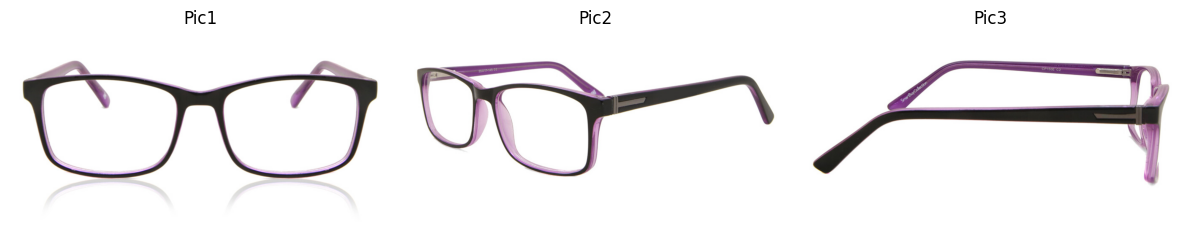

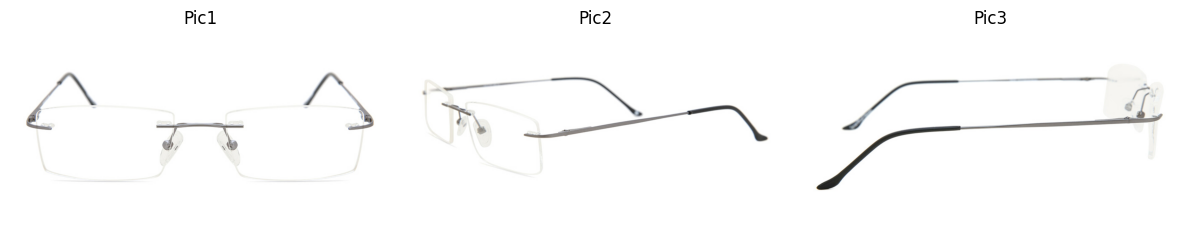

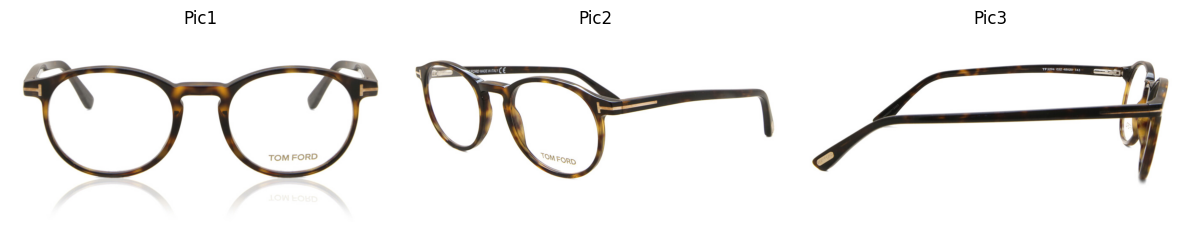

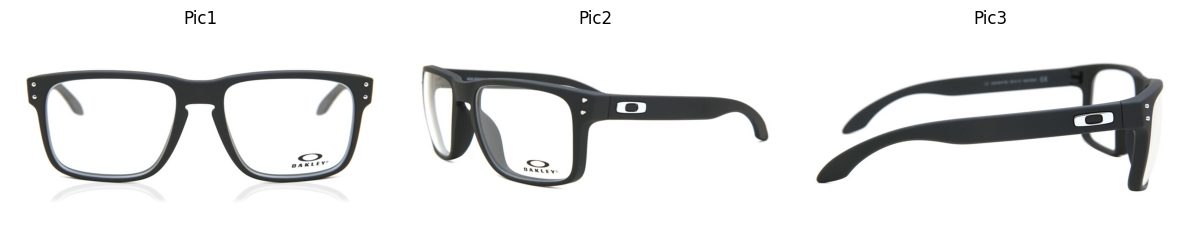

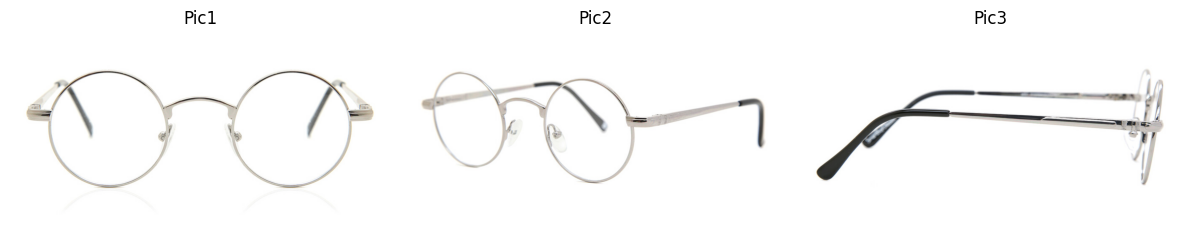

In [ ]:
import pandas as pd
import base64
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

def display_images_from_csv(file_path, row_index):
    # Read the CSV into a pandas DataFrame
    df = pd.read_csv(file_path)

    for i in range(row_index):
      # Get the base64 images from the specified row
      base64_images = df.loc[i, ['Pic1', 'Pic2', 'Pic3']]

      # Calculate the grid dimensions based on the number of images
      num_images = len(base64_images)
      num_rows = 1  # You can adjust this based on your preference
      num_cols = num_images // num_rows

      # Create a subplot for each image in the grid
      fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

      # Flatten the 2D array of axes to make it easier to iterate
      axes = axes.flatten()

      # Loop through each image and display it in the grid
      for i, (col, base64_image) in enumerate(base64_images.items()):
          # Decode base64 to bytes
          image_bytes = base64.b64decode(base64_image)

          # Create a BytesIO object to read the image
          image_buffer = BytesIO(image_bytes)

          # Open the image using PIL (Python Imaging Library)
          img = Image.open(image_buffer)

          # Display the image on the corresponding subplot
          axes[i].imshow(img)
          axes[i].set_title(col)  # Show the column name as the title
          axes[i].axis('off')  # Don't show axes

      # Adjust layout for better spacing
      plt.tight_layout()
      plt.show()

# Call the function with your file path and the row index you want to display
display_images_from_csv('cleaned_data.csv', 5)

In [ ]:
a

"b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wgARCAHCA4QDAREAAhEBAxEB/8QAHAABAAEFAQEAAAAAAAAAAAAAAAECAwQFBwYI/8QAGAEBAQEBAQAAAAAAAAAAAAAAAAECAwT/2gAMAwEAAhADEAAAAfqkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgx4v1UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [ ]:
a = df['Pic1'][1]
a[1:]

"'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wgARCAHCA4QDAREAAhEBAxEB/8QAHAABAAEFAQEAAAAAAAAAAAAAAAECAwQFBwYI/8QAGAEBAQEBAQAAAAAAAAAAAAAAAAECAwT/2gAMAwEAAhADEAAAAfqkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgx4v1UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [ ]:
file_path = 'cleaned_data.csv'
df = pd.read_csv(file_path)
a = df['Pic2'][153][1:]

base64_img_bytes = a.encode('utf-8')
with open('decode.jpg', 'wb') as file_to_save:
    decoded_image_data = base64.decodebytes(base64_img_bytes)
    file_to_save.write(decoded_image_data)

In [ ]:
import pandas as pd

# Read the CSV into a pandas DataFrame
df = pd.read_csv('cleaned_data.csv')

# Define a function to remove 'b' from each element
def clean_column(column):
    return column.str[1:]  # Exclude the first character, which is 'b'

# Apply the cleaning function to the specified columns
columns_to_clean = ['Pic1', 'Pic2', 'Pic3']
df[columns_to_clean] = df[columns_to_clean].apply(clean_column)

# Now, your 'Pic1', 'Pic2', and 'Pic3' columns are 'b'-free!

# If you wanna save it back to CSV, uncomment the next line:
df.to_csv('cleaned_data.csv', index=False)


In [ ]:
df = pd.read_csv('cleaned_data.csv')

In [ ]:
df.head()

,Link,Name,Brand,FaceShape,Price,Gender,FrameColour,FrameShape,FrameStyle,FrameMaterial,Pic1,Pic2,Pic3,LinkPic1,LinkPic2,LinkPic3
0,https://www.smartbuyglasses.co.id/designer-eye...,SmartBuy Collection Sandy CP150E,SmartBuy-Collection,heart,432259,Unisex,Black Purple,Rectangle,Full Rim,Cellulose Propionate,'/9j/4AAQSkZJRgABAQEA8ADwAAD/2wBDAAMCAgMCAgMDA...,'/9j/4AAQSkZJRgABAQEA8ADwAAD/2wBDAAMCAgMCAgMDA...,'/9j/4AAQSkZJRgABAQEA8ADwAAD/2wBDAAMCAgMCAgMDA...,https://image4.cdnsbg.com/2/430/369420_1680591...,https://image4.cdnsbg.com/2/430/369420_side_1_...,https://image4.cdnsbg.com/2/430/369420_side_2_...
1,https://www.smartbuyglasses.co.id/designer-eye...,SmartBuy Collection Linda Asian Fit 986B,SmartBuy-Collection,heart,730399,Unisex,Light Gunmetal,Rectangle,Rimless,Metal,'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgMCAgMDA...,'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgMCAgMDA...,'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgMCAgMDA...,https://image4.cdnsbg.com/2/430/387388_1599532...,https://image4.cdnsbg.com/2/430/387388_side_2_...,https://image4.cdnsbg.com/2/430/387388_side_3_...
2,https://www.smartbuyglasses.co.id/designer-eye...,Tom Ford FT5294 052,Tom-Ford,heart,3214214,Unisex,Dark Tortoise,Oval,Full Rim,Acetate,'/9j/4AAQSkZJRgABAQEA8ADwAAD/2wBDAAMCAgMCAgMDA...,'/9j/4AAQSkZJRgABAQEA8ADwAAD/2wBDAAMCAgMCAgMDA...,'/9j/4AAQSkZJRgABAQEA8ADwAAD/2wBDAAMCAgMCAgMDA...,https://image4.cdnsbg.com/2/58/225160_16796526...,https://image4.cdnsbg.com/2/58/225160_side_1_1...,https://image4.cdnsbg.com/2/58/225160_side_2_1...
3,https://www.smartbuyglasses.co.id/designer-eye...,Oakley OX8156 HOLBROOK RX 815601,Oakley,heart,1771441,Men,Satin Black,Rectangle,Full Rim,Plastic,'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgMCAgMDA...,'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgMCAgMDA...,'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgMCAgMDA...,https://image4.cdnsbg.com/2/441/434178_1599533...,https://image4.cdnsbg.com/2/441/434178_side_2_...,https://image4.cdnsbg.com/2/441/434178_side_3_...
4,https://www.smartbuyglasses.co.id/designer-eye...,SmartBuy Collection Scout Asian Fit M5C,SmartBuy-Collection,heart,589300,Unisex,Silver,Round,Full Rim,Metal,'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgMCAgMDA...,'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgMCAgMDA...,'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgMCAgMDA...,https://image4.cdnsbg.com/2/430/426600_1599532...,https://image4.cdnsbg.com/2/430/426600_side_2_...,https://image4.cdnsbg.com/2/430/426600_side_3_...
